In [1]:
import permutationTest as pt 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


In [2]:
#from utils2 import *
import time
#from significance_of_mean_cuda import significance_of_mean_cuda

### Get synthetic data

In [3]:
n_samples = 5
n = m =  500
bins =  [50, 100, 200,250,300,350,400,450,500]
data_variables = (n, n_samples, bins)

In [4]:
data = lambda n,n_samples : [np.random.randint(0,n,n,dtype=np.int32) for _ in range(n_samples)]

In [5]:
def runExperiment(method_list, names_list, data, data_variables):
    
    n, n_samples, bins = data_variables
    
    method_dict = dict()
    
    for method, name in zip(method_list, names_list):
        method_dict[name] = dict()
        method_dict[name]["p_values"] = list()
        method_dict[name]["time"] = list()
        for i in range(n_samples):
            
            np.random.seed(i)
            
            for b in bins:
                
                A = np.asarray(data(n, 1))
                B = np.asarray(data(n, 1))
        
                start = time.time()
                method_dict[name]["p_values"].append(method(A,B,b)[0])
                end = time.time()
                method_dict[name]["time"].append(end - start)
    return method_dict
    

In [6]:
method_list = [pt.GreenFloat, pt.GreenFloatMultiThread, pt.GreenFloatCuda, pt.CoinShiftFloat]
names_list = ["GreenFloat", "GreenFloatMultiThread", "GreenFloatCuda", "CoinShiftFloat"]
method_dict = runExperiment(method_list, names_list, data, data_variables)
    


In [7]:
np.allclose(np.asarray(method_dict["GreenFloat"]["p_values"]),
                np.asarray(method_dict["GreenFloatMultiThread"]["p_values"]),
                np.asarray(method_dict["GreenFloatCuda"]["p_values"]),
                np.asarray(method_dict["CoinShiftFloat"]["p_values"]))
             
    

True

In [15]:
def preparePandas(timeData, sampleSizes, name):
    """Create DF for sns-plots"""
    preparePd = list()
    for time, sample in zip(timeData, sampleSizes):
        preparePd.append([str(name),time, sample])
        
            
    return preparePd

def timePlotSNS(TimeList_list, NameList, sampleShape, y_label , x_label ,log=False, path=None):
    """Create SNS timeseries-plot"""
    a4_dims = (11.7/1.5, 8.27/1.5)
    fig, ax = plt.subplots(figsize=a4_dims)
    

    
    sns.set(style="white")
    sns.set_context("talk")
    
    for i, (time_list, name) in enumerate(zip(TimeList_list, NameList)):
        if log:
            df = preparePandas(np.log10(time_list), sampleShape, name)
        else:
            df = preparePandas(time_list, sampleShape, name)
            
        if i ==0:
            data = df
        else:
            data += df
            
    pdData = pd.DataFrame(data, columns=['Method', y_label,'bins'])
    

    if log:        
        MAX = max(pdData[y_label])
        MIN = min(pdData[y_label])

        RANGE = np.arange(np.floor(MIN), np.ceil(MAX))
        snsPlot = sns.lineplot(x="bins", y=y_label,
             hue="Method",
             data=pdData)#.set(yticks = RANGE, yticklabels=10**RANGE)
        plt.yticks(RANGE, 10.0**RANGE)
        
        
    else:
        snsPlot = sns.lineplot(x="bins", y=y_label,
             hue="Method",
             data=pdData,)
    

    plt.xlabel(x_label, fontsize=20)
    plt.ylabel(y_label, fontsize=20)
    
    
    
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles=handles[1:], labels=labels[1:])
    
    plt.setp(snsPlot.get_legend().get_texts(), fontsize=20)
    plt.xticks(size = 20)
    plt.yticks(size = 20)
    plt.tight_layout()
    
    
    
    if path:   
        fig = snsPlot.get_figure()
        fig.savefig(path)

In [10]:
TimeList_list = [method_dict["GreenFloat"]["time"], 
                 method_dict["GreenFloatMultiThread"]["time"],
                 method_dict["GreenFloatCuda"]["time"],
                 method_dict["CoinShiftFloat"]["time"]]
NameList = ["Green", "Green Multithreading", "Green Cuda", "Coin Shift"]

In [11]:
rep_bins = bins * n_samples

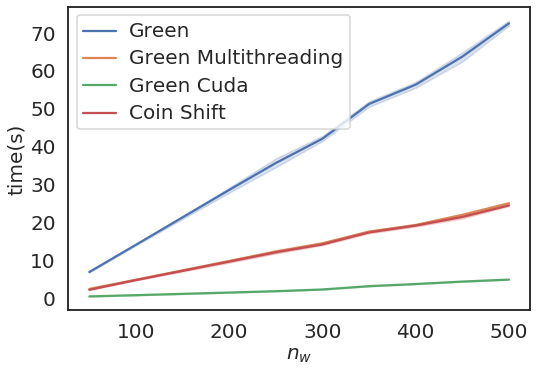

In [16]:
timePlotSNS(TimeList_list, NameList, rep_bins, 'time(s)',  r"$n_{w}$", log=False, path="./figures/experiemnt1/TimeVsbins_linear")


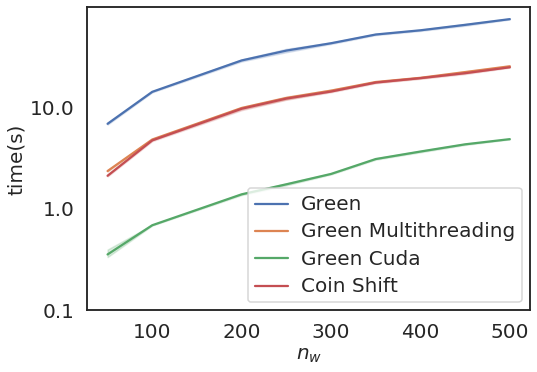

In [17]:
timePlotSNS(TimeList_list, NameList, rep_bins, 'time(s)',  r"$n_{w}$", log=True, path="./figures/experiemnt1/TimeVsbins_log")

In [18]:
n_samples = 5
N_list = [50, 100, 200,250,300,350,400,450,500]
data_variables = (N_list, n_samples, bins)

In [19]:
data = lambda n,n_samples : [np.random.randint(0,n,n,dtype=np.int32) for _ in range(n_samples)]

In [22]:
def runExperiment(method_list, names_list, data, data_variables):
    
    N_list, n_samples, bins = data_variables
    
    method_dict = dict()
    
    for method, name in zip(method_list, names_list):
        method_dict[name] = dict()
        method_dict[name]["p_values"] = list()
        method_dict[name]["time"] = list()
        for i in range(n_samples):
            
            np.random.seed(i)
            
            for n in N_list:
                
                A = np.asarray(data(n, 1))
                B = np.asarray(data(n, 1))
        
                start = time.time()
                method_dict[name]["p_values"].append(method(A,B)[0])
                end = time.time()
                method_dict[name]["time"].append(end - start)
    return method_dict
    

In [23]:
method_list = [pt.GreenInt, pt.GreenIntMultiThread, pt.GreenIntCuda, pt.CoinShiftInt]
names_list = ["GreenInt", "GreenIntMultiThread", "GreenIntCuda", "CoinShiftInt"]
method_dict = runExperiment(method_list, names_list, data, data_variables)
    

In [26]:
TimeList_list_N = [method_dict["GreenInt"]["time"], 
                 method_dict["GreenIntMultiThread"]["time"],
                 method_dict["GreenIntCuda"]["time"],
                 method_dict["CoinShiftInt"]["time"]]
NameList_N = ["Green", "Green Multithreading", "Green Cuda", "Coin Shift"]

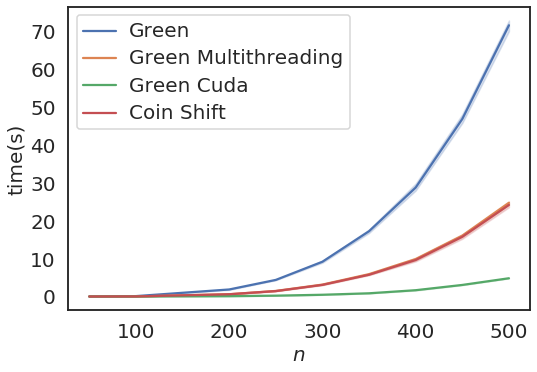

In [29]:
timePlotSNS(TimeList_list_N, NameList_N, rep_bins, 'time(s)',  r"$n$", log=False, path="./figures/experiemnt1/TimeVSetSize_linear")


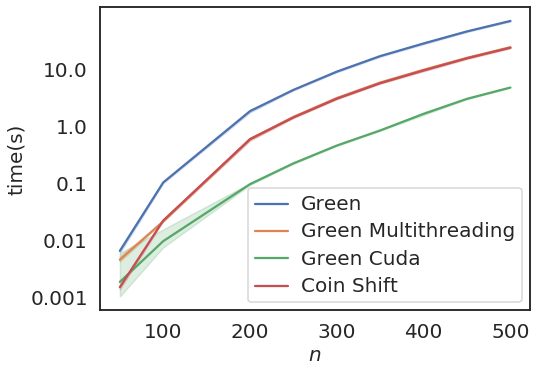

In [30]:
timePlotSNS(TimeList_list_N, NameList_N, rep_bins, 'time(s)',  r"$n$", log=True, path="./figures/experiemnt1/TimeVSetSize_log")